<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finalizamos práctica 3:

1. La función **solve_ivp** de **scipy.integrate**

2. Sistemas de ecuaciones diferenciales y ecuaciones de orden 2


Ejercicio (11 p3)

**Ecuación logística**: Una ecuación que modela el crecimiento de una población $x(t)$ limitada por la capacidad del entorno para sostenerla es:
$$
\left\{\begin{array}{l}
\dot{x}(t)=\lambda x(t) *\left(1-x(t) / X_{m}\right) \\
x(0)=x_{0},
\end{array}\right.
$$

donde $x_{0}$ es la población inicial, $\lambda$ la tasa de crecimiento poblacional intrínseca, y $X_{m}$ la población máxima soportada por el ecosistema. Supongamos $\lambda=1, X_{m}=5$.

1. Usando el comando **solve\_ivp** de Python, hallar las soluciones correspondientes a datos iniciales $x(0)=0,1,2, \ldots, 5$, para $0\leq t \leq 10$.
    
2.  La solución exacta de esta ecuación es:
    $$
    x(t)=\frac{x_{0} X_{m} e^{\lambda t}}{X_{m}-x_{0}+x_{0} e^{\lambda t}} .
    $$
  Comparar con los resultados del ítem anterior.
    
3. Hallar los puntos de equilibrio de esta ecuación, linealizar en un entorno, calcular las soluciones exactas del problema linealizado, y graficar junto a lo anterior. 


In [2]:
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
l=1 # parametro lambda
Xm = 5 # parametro Xm

fun = lambda t, x: l * x * (1 - x/Xm)
t0 = 0
T = 10


# solucion exacta:
sol_exacta = lambda t, x0: # completar

# las soluciones del problema linealizado:

sol_linear1 = lambda t, x0 : x0*np.exp(l*t) # exact solution of linearized problem around the critical point x = 0 
sol_linear2 = lambda t, x0 : (x0 - Xm)* np.exp(-l*t) + Xm # exact solution of linearized problem around the critical point x = Xm 

# el intervalo es [t0, T], en solve_ivp se lo damos como una tupla en t_span



In [ ]:
help(solve_ivp)

In [ ]:
# probamos como funciona solve_ivp
sol = solve_ivp(fun, t_span= (t0, T), y0 = [1])  
sol.y[0,:]  # me devuelve la solucion aproximada sol como un vector fila 
sol.y   # devuelve la solucion aproximada sol como una matriz con una unica fila!


In [ ]:
X0 = [[i] for i in range(6)] # estas son las distintas cond iniciales x(0)=0, 1,2, 3,4,5: ojo que x0 en solve_ivp es un array!

for x0 in X0:

  sol = solve_ivp(#completar)
  t = sol.t  # me da la grilla de los t
  x = sol.y[0,:]  # me da los x

  ax = plt.figure(figsize=(10, 6))
  plt.plot(t, x, color = "red", label = "sol numerica con  $x_0 = $" + str(x0[0]))
  plt.plot(t, sol_exacta(t, x0[0]), color = "yellow", linestyle ="dotted"  ,label = "True solution")

  plt.legend()
  plt.show()


3.

In [ ]:
X0 = [[i] for i in range(6)] # estas son las distintas cond iniciales x(0)=0, 1,2, 3,4,5: ojo que x0 en solve_ivp es un array!

for x0 in X0:

  sol = solve_ivp(#completar)
  t = sol.t  # me da la grilla de los t
  x = sol.y[0,:]  # me da los x

  ax = plt.figure(figsize=(10, 6))
  plt.plot(t, x, color = "red", label = "sol numerica con  $x_0 = $" + str(x0[0]))
  plt.plot(t, sol_exacta(t, x0[0]), color = "yellow", linestyle ="dotted"  ,label = "True solution")
  plt.plot(t, sol_linear1(t, x0[0]),  color = "green", linestyle ="dashed"  ,label = "linearized around x = 0")
  #plt.ylim(0, 10)
  plt.plot(t, sol_linear2(t, x0[0]), color = "pink", linestyle ="dashed"  ,label = "linearized around x = Xm")
  

  plt.legend()
  plt.show()


## Sistemas y ecuaciones de orden 2:

## Ejercicio: 

Modificar las funciones **euler_mod** y **RK4**  de la clase pasada para que resuleva ecuaciones vectoriales o sistemas de ecuaciones. El input $x0$ ahora debe ser un array o una lista. Si se trata de una sola ecuacion $x_0 = [x0]$. Si se trata de dos o  mas ecuaciones $x_0 =[-, -,...,-]$. 

La solución $\textbf{x}$ deberá ser una matriz de $d \times N$, donde $d$ es la cantidad de variables del problema y $N$ es el número de pasos temporales.


En la celda de abajo modificamos a manera de ejemplo la funcion **euler** para que resuleva sistemas de ecuaciones. Hacer algo similar para las rutinas Euler modificado y Runge Kutta de orden 4 

## Euler

In [ ]:

def Euler(f,t0, T,  x0, n):
    
    t = np.linspace(t0, T, n+1)
    h = (T-t0)/n
    
    X = np.zeros((len(x0), n))
    X[:,0] = np.array(x0)   # en la primera columna ponemos el valor de x a tiempo 0

    for j in range(1,n):
        X[:,j] = X[:,j-1] + h*f(t[j-1],X[:,j-1])

    return t,X 

probemos con el ejemplo anterior comparando con **solve_ivp**

In [ ]:
l=1 # parametro lambda
Xm = 5 # parametro Xm

fun = lambda t, x: l * x * (1 - x/Xm)
t0 = 0
T = 10
x0 = [1]
n = 50


(t,x) = Euler(fun, t0, T, x0, n)

sol = solve_ivp(fun, t_span=(t0, T), y0 = x0)

print("solucion numerica con Euler es: \n", x[0, :])
print("solucion con el solver solve_ivp es: \n", sol.y[0, :])

solucion numerica con Euler es: 
 [1.         1.16       1.338176   1.5341826  1.74687047 1.97418231
 2.21312294 2.459831   2.70976646 2.95800638 3.19961558 3.43003711
 3.64543834 3.84295718 4.02081582 4.17830059 4.31563288 4.43377197
 4.53419301 4.61867536 4.68912395 4.7474334  4.79539513 4.83464157
 4.86661952 4.892584   4.91360568 4.93058598 4.94427605 4.95529664
 4.96415737 4.97127451 4.9769866  4.9815681  4.98524089 4.988184
 4.99054161 4.99242971 4.99394148 4.99515171 4.99612043 4.99689574
 4.99751621 4.99801272 4.99841002 4.99872791 4.99898227 4.99918577
 4.99934859 4.99947886]
solucion con el solver solve_ivp es: 
 [1.         1.08629685 2.20668215 4.08865971 4.71140673 4.91709289
 4.98252349 4.99695141 4.99890277]


## Euler modificado

In [ ]:
def euler_mod(f,t0,T,x0,n):
  """
  Esta funcion implementa el metodo de Euler modificado 
  x_i = x_{i-1} + h f(t_{i-1}+0.5*h, x_{i-1} + 0.5*h*f(t_{i-1}, x_{i-1})
  para resolver 
                   x'(t) = f(t,x)
  en n pasos, en el intervalo [t0, T]  con condicion inicial x(t0) =x0

  """

  t = np.linspace(t0, T, n+1) 

  x = np.zeros(n+1) 
  x[0]=x0 
  h = (T-t0)/n #paso

  for i in range(1, n+1): 
    x[i] = x[i-1] + h * f(t[i-1] + 0.5*h, x[i-1] + 0.5 * h * f(t[i-1], x[i-1]))


  return(t,x) 

# euler modificado para sistemas:



def Euler_mod(f, t0, T, x0, n):
  """
  Esta funcion implementa el metodo de Euler modificado 
  x_i = x_{i-1} + h f(t_{i-1}+0.5*h, x_{i-1} + 0.5*h*f(t_{i-1}, x_{i-1})
  para resolver 
                   x'(t) = f(t,x)
  en n pasos, en el intervalo [t0, T]  con condicion inicial x(t0) =x0 donde x puede ser un vector de R^d

  """

  t = np.linspace(t0, T, n+1)
  h = (T-t0)/n
    
  
  X = np.zeros((len(x0), n+1))
  X[:,0] = x0   # en la primera columna ponemos el valor o vector de x a tiempo 0

  for j in range(1,n):
      X[:,j] = # completar   

  return t,X 




probemos con el ejemplo:

In [ ]:
l=1 # parametro lambda
Xm = 5 # parametro Xm

fun = lambda t, x: l * x * (1 - x/Xm)
t0 = 0
T = 10
x0 = [1]
n = 20

(t,x) = Euler_mod(fun, t0, T, x0, n)

sol = solve_ivp(fun, t_span=(t0, T), y0 = x0)

print("solucion numerica con Euler modificado es: \n", x[0, :])
print("solucion con el solver solve_ivp es: \n", sol.y[0, :])

solucion numerica con Euler modificado es: 
 [1.         1.456      2.0192209  2.64098679 3.2455118  3.76437598
 4.16529195 4.45205127 4.64689286 4.77507755 4.85775655 4.91044387
 4.94377138 4.96475697 4.97793397 4.98619343 4.99136492 4.99460074
 4.99662455 4.99788999]
solucion con el solver solve_ivp es: 
 [1.         1.08629685 2.20668215 4.08865971 4.71140673 4.91709289
 4.98252349 4.99695141 4.99890277]


In [ ]:
x

array([[1.        , 1.456     , 2.0192209 , 2.64098679, 3.2455118 ,
        3.76437598, 4.16529195, 4.45205127, 4.64689286, 4.77507755,
        4.85775655, 4.91044387, 4.94377138, 4.96475697, 4.97793397,
        4.98619343, 4.99136492, 4.99460074, 4.99662455, 4.99788999]])

## Runge Kutta

In [ ]:
# runge Kutta


def orden4(f, tval, x, h):
    
    k1 = f(tval, x)
    k2 = f(tval + 0.5*h, x + 0.5*h*k1)
    k3 = f(tval + 0.5*h, x + 0.5*h*k2)
    k4 = f(tval + h, x + h*k3)
    
    x = x +h*(k1 + 2*k2 +2*k3 + k4)/6
    
    return x


    

def RK4(f, t0, T, x0, n):
    
    t = np.linspace(t0, T, n+1)
    h  = (T - t0)/n
    
    X = np.zeros((len(x0),n+1))
    
    X[:,0] = x0
    for j in range(1,n):
        X[:,j] = orden4(f, t[j-1], X[:, j-1], h)

    return t, X


probemos con el ejemplo:

In [ ]:
l=1 # parametro lambda
Xm = 5 # parametro Xm

fun = lambda t, x: l * x * (1 - x/Xm)
t0 = 0
T = 10
x0 = [1]
n = 20

(t,x) = RK4(fun, t0, T, x0, n)

sol = solve_ivp(fun, t_span=(t0, T), y0 = x0)

print("solucion numerica con Runge Kutta 4 es: \n", x[0, :])
print("solucion con el solver solve_ivp es: \n", sol.y[0, :])

solucion numerica con Runge Kutta 4 es: 
 [1.         1.45931802 2.02294155 2.64184566 3.24378321 3.76393358
 4.16943397 4.46092545 4.65847481 4.78707475 4.86861174 4.91944853
 4.95081344 4.97003963 4.98177817 4.98892773 4.99327584 4.99591783
 4.99752226 4.99849629]
solucion con el solver solve_ivp es: 
 [1.         1.08629685 2.20668215 4.08865971 4.71140673 4.91709289
 4.98252349 4.99695141 4.99890277]


## Ejemplos de Sistemas:

## Ejercicio 14

Sistema predador-presa. Sea el sistema

$$
\left\{\begin{array}{l}
\dot{x}(t)=-\alpha x(t)+\gamma x(t) y(t), \\
\dot{y}(t)=\beta y(t)-\delta x(t) y(t) .
\end{array}\right.
$$


Tomando $\alpha=0.25, \beta=1, \gamma=\delta=0.01$ resolver usando el comando **solve_ivp** de Python y realizar gráficos para distintos valores de $x(0)$ e $y(0)$. 


In [ ]:
# seteamos parametros


alpha = 0.25
beta = 1
gamma = 0.01
delta = gamma

def depredador(t, X):
    
    x = X[0]
    y = X[1]
    xpunto = -alpha*x + gamma*x*y
    ypunto = beta*y - delta*x*y
    
    Xpunto = np.hstack((xpunto, ypunto))
    
    return Xpunto


In [ ]:
x0 = [1, 2]
t0 = 0
T = 1
h = 0.0001
n = int((T-t0)/h)

(t, x) =  RK4(#completar)
sol = solve_ivp(#completar)



# ploteamos:
plt.figure(figsize = (20, 6))
plt.subplot(121)
plt.plot(t, x[0,:],  label = "x(t) usando nuestro RK4")
plt.plot(sol.t, sol.y[0,:], label = "x(t) usando solve_ivp")
plt.legend()

plt.subplot(122)
plt.plot(t, x[1,:],  label = "x(t) usando nuestro RK4")
plt.plot(sol.t, sol.y[1,:], label = "y(t) usando solve_ivp")
plt.legend()
plt.show()

## Ejercicio 18

Péndulo: Se considera el problema del péndulo

$$
\left\{\begin{array}{l}
\ddot{\theta}(t)=-A \operatorname{sen}(\theta(t)) \\
\theta(0)=\theta_{0} \\
\dot{\theta}(0)=v_{0}
\end{array}\right.
$$

donde $\theta$ representa el ángulo que forma la vara del péndulo con la vertical.

1. Formular el problema como un sistema de ecuaciones de primer orden.

2. Utilizar el método de Euler modificado, con paso $h=0.05$ para obtener una aproximación de la solución en $[0, T]$ y graficarla.

3. Graficar la solución que se obtiene al utilizar método de Runge-Kutta del Ejercicio 9.

Pueden considerarse, a modo de ejemplo, los valores $A=7, T=10, \theta_{0}=\pi / 4, v_{0}=0$.

In [ ]:
def pendulo(t, X):
    A = 7
    x = X[0]
    y = X[1]
    xpunto = # completar
    ypunto = # completar
    
    Xpunto = np.hstack((xdot, ydot))
    
    return Xpunto


In [ ]:
# seteamos los parámetros:
t0 = 0
T = 10
x0 = np.array([np.pi/4, 0])
h = 0.05
n= int((T-t0)/h)


In [ ]:
t_EM, X_EM = Euler_mod(pendulo, t0, T, x0, n)

t, X_RK4 = RK4(pendulo, t0, T, x0, n)

sol = solve_ivp(pendulo, t_span = (t0, T), y0 = x0, t_eval = t)

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(321)
plt.plot(t_EM, X_EM[0,:])
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular $\theta(t)$ usando Euler Modificado')


plt.subplot(322)
plt.plot(X_EM[0,:], X_EM[1,:])
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')

plt.subplot(323)
plt.plot(t, X_RK4[0,:], color = 'darkblue')
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular usando RK4')

plt.subplot(324)
plt.plot(X_RK4[0,:], X_RK4[1,:],color = 'darkblue')
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')


plt.subplot(325)
plt.plot(sol.t, sol.y[0,:], color = 'darkblue')
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular usando solve_ivp')

plt.subplot(326)
plt.plot(sol.y[0,:], sol.y[1,:],color = 'darkblue')
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')



plt.tight_layout(pad=3.0)

plt.show()


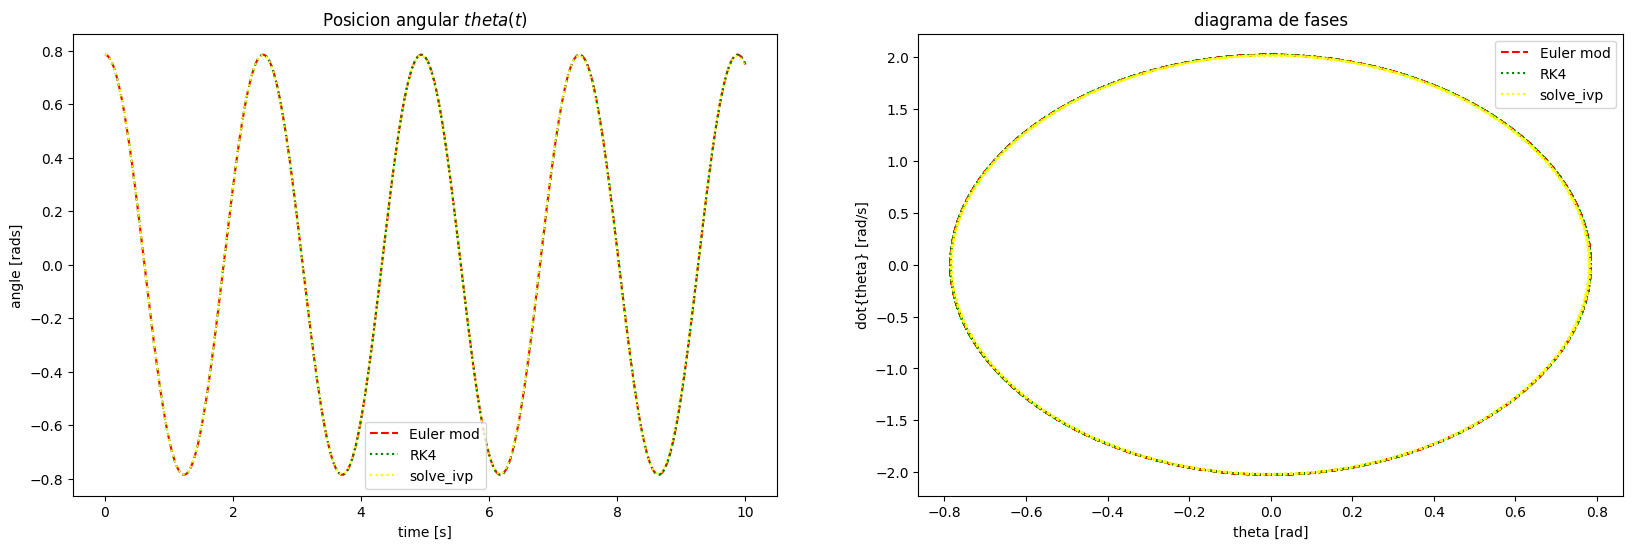

In [ ]:
# todas las soluciones juntas:

plt.figure(figsize = (20,6))
plt.subplot(121)
plt.plot(t_e, X_EM[0,:], label = "Euler mod", linestyle ="dashed", color = "red")
plt.plot(t, X_RK4[0,:], label = "RK4", linestyle ="dotted", color = "green")
plt.plot(sol.t, sol.y[0,:], label = "solve_ivp", linestyle ="dotted", color = "yellow")
plt.xlabel('time [s]')
plt.ylabel('angle [rads]')
plt.title('Posicion angular $theta(t)$')
plt.legend()


plt.subplot(122)
plt.plot(X_EM[0,:], X_EM[1,:], label = "Euler mod", linestyle ="dashed", color = "red")
plt.plot(X_RK4[0,:], X_RK4[1,:], label = "RK4", linestyle ="dotted", color = "green")
plt.plot(sol.y[0,:], sol.y[1,:], label = "solve_ivp", linestyle ="dotted", color = "yellow")
plt.xlabel('theta [rad]')
plt.ylabel('dot{theta} [rad/s]')
plt.title('diagrama de fases')
plt.legend()

plt.show()





## Ejercicio 19 p3. Oscilador no lineal:
Dada la ecuación $\ddot{x}(t) = -2 x^{3}(t) + x(t)$

a) Formular el problema como un sistema de ecuaciones de primer orden.

b) Utilizar el método de Runge-Kutta de cuarto orden para obtener las soluciones correspondientes a las condiciones iniciales $x(0) = -2;-1.9;\ldots;1.9;2$ y $\dot{x}(0) = 0$.

c) Graficarlas en el diagrama de fases.

d) Graficar la cantidad $H(t) = \dot{x}^{2}(t) + x^{4}(t) - x^{2}(t)$ para cada solución.

